# Validate Alpha Parameter
*This notebook plots the LOOCV of ridge regression across a range of alpha values and verifies that peak-engines finds an optimum.*

## Import dependencies

In [1]:
import numpy as np
import pandas as pd
import peak_engines
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Load the pollution dataset
The data is from
> McDonald and Schwing (1973), "Instabilities of Regression Estimates Relating Air Pollution to Mortality," Technometrics, 15, 463-481

and is available at [NCSU](https://www4.stat.ncsu.edu/~boos/var.select/pollution.html).

In [2]:
df = pd.read_csv('pollution/pollution.tsv', 
                 header=0, delim_whitespace=True)
X = np.array(df.iloc[:, :-1].values, dtype=float)
X = StandardScaler().fit_transform(X)
y = np.array(df.iloc[:,-1].values, dtype=float)
X = StandardScaler().fit_transform(X)
y /= np.std(y)

## Fit a ridge regression model so as to mimize the LOOCV error

In [3]:
model = peak_engines.RidgeRegressionModel()
model.fit(X, y)
alpha_best = model.alpha_
print("alpha = ", alpha_best)

alpha =  8.437006536233131


## Plot the LOOCV error for different values of alpha

In [4]:
alphas = np.arange(0.1, 20, .1)
scores = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    score = cross_validate(model, X, y, cv=LeaveOneOut(), scoring='neg_mean_squared_error')
    scores.append(-score['test_score'].mean())

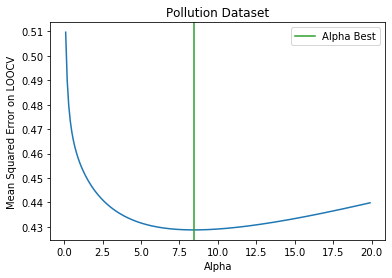

In [5]:
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error on LOOCV')
plt.plot(alphas, scores)
plt.axvline(alpha_best, color='tab:green', label='Alpha Best')
plt.title('Pollution Dataset')
plt.legend(loc='upper right')